# 0: Import packages and Data.

Let's import the prerequisite packages and data we'll need to begin, and take a quick look at the data.

In [1]:
# Data manipulation.
import pandas as pd
import numpy as np

# Data visualization.
from vega_datasets import data
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors

# Regression modeling.
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Searching for combining variables and seeking interaction relationships.
from itertools import combinations

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
# Read in the listings dataframe.
listings_df = pd.read_csv('final_listings_BACKUP.csv')
listings_df.drop(columns=['Unnamed: 0'],inplace=True)

# read in the zip code dataframe.
zipcodes_df = pd.read_csv('final_zipcodes_BACKUP.csv')
zipcodes_df.drop(columns=['Unnamed: 0'],inplace=True)

In [3]:
# Take a peek at the first 5 records.
listings_df.head()

title  \
0  Dog paradise, ATVs, hikes,canyons, eggs,420, f...   
1     Cozy & Quiet 3 bedroom Mountain Cabin Retreat.   
2                  Palisade Tent at Gateway Glamping   
3             The Escalante Tent at Gateway Glamping   
4              Desert Glamping on the Delores River!   

                     subtitle  superhost  rating  n_ratings  price  guests  \
0        Farm stay in Paradox        1.0    4.95       42.0    228      12   
1  Entire cabin in Glade Park        0.0     NaN        NaN    157       8   
2             Tent in Gateway        1.0    5.00       10.0    125       2   
3             Tent in Gateway        1.0     NaN        NaN    125       2   
4        Camper/RV in Gateway        0.0     NaN        NaN     85       2   

   bedrooms  beds  baths                                          amenities  \
0         2   2.0    1.0  ['Wifi', 'Kitchen', 'Indoor fireplace', 'Free ...   
1         3   4.0    2.0  ['Wifi', 'Kitchen', 'Indoor fireplace', 'Free ...   
2         1   1.0    1.0                        ['Kitchen', 'Free parking']   
3         1   1.0    1.0                        ['Kitchen', 'Free parking']   
4         1   1.0    0.0                        ['Kitchen', 'Free parking']   

   n_amenities                                       picture_link  \
0          4.0  https://a0.muscache.com/im/pictures/a854c2ba-9...   
1          4.0  https://a0.muscache.com/im/pictures/miso/Hosti...   
2          2.0  https://a0.muscache.com/im/pictures/18691dd9-8...   
3          2.0  https://a0.muscache.com/im/pictures/27cef231-6...   
4          2.0  https://a0.muscache.com/im/pictures/d58d96af-4...   

                                        listing_link  est_lat   est_lng  \
0  https://www.airbnb.com/rooms/44060617?previous...   38.305 -109.0142   
1  https://www.airbnb.com/rooms/59119403792095169...   38.955 -109.0142   
2  https://www.airbnb.com/rooms/48296711?previous...   38.680 -108.9892   
3  https://www.airbnb.com/rooms/52169821?previous...   38.680 -108.9892   
4  https://www.airbnb.com/rooms/53459603?previous...   38.655 -108.9642   

   zipcode           county  
0    81429  Montrose County  
1    81523      Mesa County  
2    81522      Mesa County  
3    81522      Mesa County  
4    81522      Mesa County

In [4]:
# Shape of the dataset.
listings_df.shape

(31901, 18)

In [5]:
# Take a peek at the first 5 records.
zipcodes_df.head()

zipcode  population  pop_density_sq_mile  housing_units  median_home_price  \
0    80013     69588.0               4975.0        26047.0           192800.0   
1    80219     61296.0               8166.0        20448.0           151000.0   
2    80015     62432.0               4367.0        21996.0           241500.0   
3    80134     55075.0                977.0        20452.0           310200.0   
4    80634     52861.0               1418.0        21776.0           184900.0   

   land_area_sq_mile  water_area_sq_mile  occupied_housing_units  \
0              13.99                0.00                 24791.0   
1               7.51                0.07                 19171.0   
2              14.30                0.23                 21240.0   
3              56.35                0.08                 19555.0   
4              37.28                0.09                 20456.0   

   median_household_income  median_age  ...  edu_per_less_than_hs  edu_per_hs  \
0                  67857.0        34.0  ...                 0.080        0.51   
1                  39659.0        30.0  ...                 0.365        0.48   
2                  80599.0        35.0  ...                 0.050        0.43   
3                 100739.0        35.0  ...                 0.020        0.35   
4                  58959.0        36.0  ...                 0.100        0.50   

   edu_per_associates  edu_per_bachelors  edu_per_masters  \
0               0.121              0.205            0.069   
1               0.048              0.079            0.022   
2               0.100              0.270            0.110   
3               0.090              0.390            0.120   
4               0.090              0.200            0.070   

   edu_per_professional  edu_per_phd  child_edu_per_enrolled_public  \
0                 0.009        0.005                          0.820   
1                 0.004        0.002                          0.839   
2                 0.020        0.010                          0.857   
3                 0.020        0.010                          0.800   
4                 0.010        0.020                          0.779   

   child_edu_per_enrolled_private  child_edu_per_not_enrolled  
0                           0.078                       0.102  
1                           0.021                       0.140  
2                           0.086                       0.057  
3                           0.134                       0.066  
4                           0.119                       0.103  

[5 rows x 38 columns]

In [6]:
# Shape of the dataset.
zipcodes_df.shape

(511, 38)

# 1: Feature Engineering in main datasets.

There are a couple of new variables we want to encode in these datasets before we get into too much further manipulation.

* `edu_per_bachelors_or_higher`: We want to to sum all education levels Bachelors or higher to see what percent of a zipcode have at least an undergraduate degree.
* `housing_per_owned_w_mortgage * child_edu_per_enrolled_public`: A proxy for family friendliness, we found in some early testing that the multipled interaction of these two columns correlated with some of the variables of interest.

In [7]:
# Feature engineering: % of zipcode with a Bachelors or higher.
zipcodes_df['edu_per_bachelors_or_higher'] = (
    zipcodes_df['edu_per_phd'] +
    zipcodes_df['edu_per_professional'] +
    zipcodes_df['edu_per_masters'] +
    zipcodes_df['edu_per_bachelors']
)

# Feature engineering: indicator of how "family friendly" a community is.
zipcodes_df['housing_per_owned_w_mortgage * child_edu_per_enrolled_public'] = (
    zipcodes_df['housing_per_owned_w_mortgage'] * 
    zipcodes_df['child_edu_per_enrolled_public']
)



# 2. Create `groupby_area` function

This is going to be our shorthand throughout the notebook of aggregating the dataset, or different splices of the dataset, at different geographic levels.

We'll go ahead and use this to create a DataFrame that groups results at the county level (`county`) as well as at the zipcode level (`listings_zipcode`). For this first instance of `listings_zipcode`, we'll actually group by unique zip code latitude/longtidue locations for geographic visualization purposes - meaning there will be more than one record for each zip code. Later, we'll switch `listings_zipcodes` to become a one record per zip code DataFrame when we need it to be so for regression modeling.

In [8]:
# Group by function. Re-used several times in the dataset.
def groupby_area(group, df=listings_df):
    count = df.groupby(group).size().reset_index()
    price = df.groupby(group).agg({'price': ['mean','median','min','max']}).reset_index()
    frame = count.merge(price, on=group,how='left')
    frame.columns = [group,'count','mean_price','median_price','min_price','max_price']
    return frame

In [9]:
# County level aggregations.
county = groupby_area('county')

# Take a peek at the first 5 records.
county.head()

<ipython-input-8-7f75decaf663>:5: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  frame = count.merge(price, on=group,how='left')
<ipython-input-8-7f75decaf663>:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  frame = count.merge(price, on=group,how='left')


county  count  mean_price  median_price  min_price  max_price
0      Adams County   1159  141.803279         106.0          1        981
1    Alamosa County     79  132.075949         102.0         22        414
2     Albany County      1  131.000000         131.0        131        131
3   Arapahoe County   2941  142.577015         115.0          1        999
4  Archuleta County    776  189.904639         165.0          1        940

In [10]:
# Create a mapping of counties to ANSI ID's. This ended up not being required by the analysis,
# but would have allowed me to map county-level results geographically.
ansi = pd.read_csv('https://www2.census.gov/geo/docs/reference/codes/files/national_county.txt', sep=',', dtype=str)
ansi.columns = ['state','state_id','id', 'county', 'statens']
ansi['id'] = ansi['state_id'] + ansi['id']

# Cleaning function to get to format to match.
def strip_leading_zero(x):
    return x[1:]

# Apply cleaning function.
ansi['id'] = ansi['id'].apply(strip_leading_zero)

# Filter down to only Colorado listings.
ansi = ansi[ansi['state']=='CO'][['id', 'county']]

# Take a peek at the first 5 records.
ansi.head()

id            county
243  8001      Adams County
244  8003    Alamosa County
245  8005   Arapahoe County
246  8007  Archuleta County
247  8009       Baca County

In [11]:
# Merge ansi mappings into county DataFrame.
county = pd.merge(county, ansi, how='left', on='county')

In [12]:
# Take a peek at the first 5 records.
county.head()

county  count  mean_price  median_price  min_price  max_price  \
0      Adams County   1159  141.803279         106.0          1        981   
1    Alamosa County     79  132.075949         102.0         22        414   
2     Albany County      1  131.000000         131.0        131        131   
3   Arapahoe County   2941  142.577015         115.0          1        999   
4  Archuleta County    776  189.904639         165.0          1        940   

     id  
0  8001  
1  8003  
2   NaN  
3  8005  
4  8007

In [13]:
# zip code level aggregations.
listings_zipcodes = groupby_area('zipcode')

# Create a record for each unique zipcode - estimate latitude / longitude record.
# This means there will be more than one record for each zip code. This is done 
# primarily for visualization purposes.
listings_zipcodes = pd.merge(listings_zipcodes,listings_df[['zipcode','est_lat','est_lng','county']].drop_duplicates(),on='zipcode',how='left')

# Take a peek at the first 5 records.
listings_zipcodes.head()

<ipython-input-8-7f75decaf663>:5: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  frame = count.merge(price, on=group,how='left')
<ipython-input-8-7f75decaf663>:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  frame = count.merge(price, on=group,how='left')


zipcode  count  mean_price  median_price  min_price  max_price  est_lat  \
0     6210      7  150.285714         140.0         50        308   39.780   
1     6210      7  150.285714         140.0         50        308   39.805   
2     8011      4  128.750000         130.0        125        130   39.580   
3     8017     22   74.227273          52.5         13        229   38.655   
4     8017     22   74.227273          52.5         13        229   38.605   

    est_lng            county  
0 -105.1642  Jefferson County  
1 -105.1642  Jefferson County  
2 -104.8142   Arapahoe County  
3 -104.7142    El Paso County  
4 -104.6892    El Paso County

# 3. What does the price and presence of AirBnB look like in each zip code?

Using the grouped data from above, we'll create a few exploratory visualization that help us see the spread of AirBnB across the map.

In [14]:
# Import counties.
source = alt.topo_feature(data.us_10m.url, feature='counties')


# create chart 1: "count_chart".
base = alt.Chart(source).mark_geoshape(
    fill='white', 
    stroke='black', 
    strokeWidth=0.5
    ).transform_calculate(
        state_id = "(datum.id / 1000)|0"
    ).transform_filter(
        (alt.datum.state_id)==8
    )


points = alt.Chart(listings_zipcodes).mark_circle().encode(
    longitude='est_lng:Q',
    latitude='est_lat:Q',
    color=alt.Color('count:Q', scale=alt.Scale(range=['#ffa600','#bc5090', '#003f5c'],reverse=True,domain=[0,1500], domainMid=500), legend=alt.Legend(title='# AirBnB Listings')),
    tooltip=['county:N','zipcode:N','count:Q']
).properties(
    width=650*.5,
    height=400*.5,
    title='How Many AirBnB listings are there in each Zipcode in CO?'
)

count_chart = base + points


In [15]:
# Import counties.
source = alt.topo_feature(data.us_10m.url, feature='counties')

# create chart 1: "median_chart".
base = alt.Chart(source).mark_geoshape(
    fill='white', 
    stroke='black', 
    strokeWidth=0.5
    ).transform_calculate(
        state_id = "(datum.id / 1000)|0"
    ).transform_filter(
        (alt.datum.state_id)==8
    )


points = alt.Chart(listings_zipcodes).mark_circle().encode(
    longitude='est_lng:Q',
    latitude='est_lat:Q',
    color=alt.Color('median_price:Q', scale=alt.Scale(range=['#ffa600','#bc5090', '#003f5c'],reverse=True,domain=[0,1300], domainMid=200), legend=alt.Legend(title='Median Nightly Price')),
    tooltip=['county:N','zipcode:N','median_price:Q']
).properties(
    width=650*.5,
    height=400*.5,
    title='What is the Median Nightly Price in each Zipcode in CO?'
)

median_chart = base + points

In [16]:
# Import counties.
source = alt.topo_feature(data.us_10m.url, feature='counties')

# create chart 1: "max_chart".
base = alt.Chart(source).mark_geoshape(
    fill='white', 
    stroke='black', 
    strokeWidth=0.5
    ).transform_calculate(
        state_id = "(datum.id / 1000)|0"
    ).transform_filter(
        (alt.datum.state_id)==8
    )


points = alt.Chart(listings_zipcodes).mark_circle().encode(
    longitude='est_lng:Q',
    latitude='est_lat:Q',
    color=alt.Color('max_price:Q', scale=alt.Scale(range=['#ffa600','#bc5090', '#003f5c'],reverse=True,domain=[0,1300], domainMid=600), legend=alt.Legend(title='Max Nightly Price')),
    tooltip=['county:N','zipcode:N','max_price:Q']
).properties(
    width=650*.5,
    height=400*.5,
    title='What is the Max Nightly Price in each Zipcode in CO?'
)

max_chart = base + points

In [17]:
# Import counties.
source = alt.topo_feature(data.us_10m.url, feature='counties')

# create chart 4: "min_chart".
base = alt.Chart(source).mark_geoshape(
    fill='white', 
    stroke='black', 
    strokeWidth=0.5
    ).transform_calculate(
        state_id = "(datum.id / 1000)|0"
    ).transform_filter(
        (alt.datum.state_id)==8
    )


points = alt.Chart(listings_zipcodes).mark_circle().encode(
    longitude='est_lng:Q',
    latitude='est_lat:Q',
    color=alt.Color('min_price:Q', scale=alt.Scale(range=['#ffa600','#bc5090', '#003f5c'],reverse=True,domain=[0,1000], domainMid=50), legend=alt.Legend(title='Min Nightly Price')),
    tooltip=['county:N','zipcode:N','min_price:Q']
).properties(
    width=650*.5,
    height=400*.5,
    title='What is the Min Nightly Price in each Zipcode in CO?'
)

min_chart = base + points

In [18]:
# Combine all charts.
alt.vconcat(
alt.hconcat(count_chart, median_chart).resolve_scale(color='independent'),
alt.hconcat(min_chart, max_chart).resolve_scale(color='independent')
).resolve_scale(color='independent')

alt.VConcatChart(...)

### Generate explanatory chart for the presentation.

The above chart is nice, but it's _exploratory_ in nature, not _explanatory_. Let's narrow it down to just the top left chart, and pair it with a bar chart, to be used in the PDF presentation.

In [19]:
# Import counties.
source = alt.topo_feature(data.us_10m.url, feature='counties')

# Generate cleaned up, larger count_chart.
base = alt.Chart(source).mark_geoshape(
    fill='white', 
    stroke='black', 
    strokeWidth=0.5
    ).transform_calculate(
        state_id = "(datum.id / 1000)|0"
    ).transform_filter(
        (alt.datum.state_id)==8
    )


points = alt.Chart(listings_zipcodes).mark_circle().encode(
    longitude='est_lng:Q',
    latitude='est_lat:Q',
    color=alt.Color('count:Q', scale=alt.Scale(range=['#ffa600','#bc5090', '#003f5c'],reverse=True,domain=[0,1500], domainMid=500), legend=alt.Legend(title='# AirBnB Listings')),
    tooltip=['county:N','zipcode:N','count:Q']
).properties(
    width=650*1.25,
    height=400*1.25,
    title='How Many AirBnB listings are there in each Zipcode in CO?'
)

count_chart = base + points


In [20]:
# Generate bar chart of the top 10 counties by the # of AirBnB listings multipled by the median price of listings.

county['count x median_price'] = county['count'] * county['median_price']

county_bar = alt.Chart(county).mark_bar(color='#003f5c').encode(
    x=alt.X('county',sort='-y',axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('count x median_price', axis=alt.Axis(labelExpr='"$" + datum.value/1000 + "K"'), title='Listings x Median Nightly Price')
).transform_window(
    rank='rank(count x median_price)',
    sort=[alt.SortField('count x median_price', order='descending')]
).transform_filter(
    (alt.datum.rank <= 10)
).properties(
    width=650*1.25,
    height=400*.45,
    title='Which Counties have the highest Listing Market Value?'
)


In [21]:
alt.vconcat(count_chart, county_bar)

alt.VConcatChart(...)

# 4. Group listings by longitude.

One of the things noticed in the prior visualizations is how towns in western Colorado (particularly ski towns) have higher nightly revenue potential. I want to see if the longitude (east-west) location of a listing influences its price.

In [22]:
# The mountains in Colorado generally roll from east to west, start on the front range (around -105.5 longitude).
# We'll create a new variable `est_lng_rounded`, rounded to the tenth place, so we can aggregate how listings change
# as their location moves from east to west.
listings_df['est_lng_rounded'] = round(listings_df['est_lng'],1)
listings_lng = groupby_area('est_lng_rounded')

# Peek at first 5 records.
listings_lng.head()

<ipython-input-8-7f75decaf663>:5: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  frame = count.merge(price, on=group,how='left')
<ipython-input-8-7f75decaf663>:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  frame = count.merge(price, on=group,how='left')


est_lng_rounded  count  mean_price  median_price  min_price  max_price
0           -109.0      6  257.666667         141.0         85        826
1           -108.9     10  161.700000         128.0         62        380
2           -108.8     40  140.950000         101.5         22        800
3           -108.7    182  152.571429         134.5          1        607
4           -108.6    273  126.238095         111.0         27        800

# 5. Do AirBnB listings get more expensive in the mountains?

Create a nightly revenue potential price map visualization of Colorado, and a bar chart that lines up to show the median price in a given zip code. We can see two spikes -- one along the front range (where Denver and Colorado Springs are), and one in the mountains (where the ski towns are).

In [23]:
# Feature engineering: create listing value price for each zipcode.
listings_zipcodes['count x median_price'] = listings_zipcodes['count'] * listings_zipcodes['median_price']

# Import counties.
source = alt.topo_feature(data.us_10m.url, feature='counties')

# Create median price chart.
base = alt.Chart(source).mark_geoshape(
    fill='white', 
    stroke='black', 
    strokeWidth=0.5
    ).transform_calculate(
        state_id = "(datum.id / 1000)|0"
    ).transform_filter(
        (alt.datum.state_id)==8
    )


points = alt.Chart(listings_zipcodes).mark_circle().encode(
    longitude='est_lng:Q',
    latitude='est_lat:Q',
    color=alt.Color('count x median_price:Q', scale=alt.Scale(range=['#ffa600','#bc5090', '#003f5c'],reverse=True), legend=alt.Legend(title='Market value')),
    tooltip=['county:N','zipcode:N','median_price:Q','est_lng']
).properties(
    width=650*1.25,
    height=400*1.25,
    title='What is the median price of AirBnB listings in each Zipcode in CO?'
)

median_chart = base + points


In [24]:
# Feature engineering: create listing value price for each rounded longitude.
listings_lng['count x median_price'] = listings_lng['count'] * listings_lng['median_price']

# Create bar chart for listinv value for each longitude, rounded to the tenth place.
listings_lng_bar = alt.Chart(listings_lng).mark_bar(color='#003f5c').encode(
    x=alt.X('est_lng_rounded',sort='-x',axis=alt.Axis(labelAngle=-45), scale=alt.Scale(domain=[-108.5, -101.5])),
    y=alt.Y('count x median_price', axis=alt.Axis(labelExpr='"$" + datum.value/1000 + "K"'), title='Listings x Median Nightly Price'),
    color=alt.Color('count x median_price:Q', scale=alt.Scale(range=['#ffa600','#bc5090', '#003f5c'],reverse=True), legend=alt.Legend(title='market value'))
).properties(
    width=650*1.25,
    height=400*.45,
    title='Median Nightly Value by Latitude'
)


In [25]:
# Combine charts together.
alt.vconcat(
median_chart,
listings_lng_bar).resolve_scale(color='independent')

alt.VConcatChart(...)

# 6. Is there a relationship between the median price and the factors in the community?

This section walks through a few different iterations at creating correlation heatmaps to find variables that predict the median price in a given zip code. In the end, we split it up into two populations (zipcodes in the mountains, and zipcodes not in the mountains) to show the differences in the predicting variables between these two communities.

In [26]:
# Re-create a zipcodes level data. This one will have one record per zip code, unlike the prior version which
# had latitude and longitude data encoded in for geographic visualization purposes.
listings_zipcodes = groupby_area('zipcode')
listings_zipcodes

<ipython-input-8-7f75decaf663>:5: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  frame = count.merge(price, on=group,how='left')
<ipython-input-8-7f75decaf663>:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  frame = count.merge(price, on=group,how='left')


zipcode  count  mean_price  median_price  min_price  max_price
0       6210      7  150.285714         140.0         50        308
1       8011      4  128.750000         130.0        125        130
2       8017     22   74.227273          52.5         13        229
3       8051    146  211.767123         197.0          1        600
4       8117    189  276.650794         219.0          1        973
..       ...    ...         ...           ...        ...        ...
472    82036      3    1.333333           1.0          1          2
473    82070      1  131.000000         131.0        131        131
474    82152     31  207.516129         189.0         80        524
475    86111      3  590.000000         850.0          2        918
476    86537      8  147.000000         108.5         65        425

[477 rows x 6 columns]

In [27]:
# Merge on zip code data.
listings_and_zipcodes_df = pd.merge(listings_zipcodes, zipcodes_df,how='left',on='zipcode')
listings_and_zipcodes_df

zipcode  count  mean_price  median_price  min_price  max_price  \
0       6210      7  150.285714         140.0         50        308   
1       8011      4  128.750000         130.0        125        130   
2       8017     22   74.227273          52.5         13        229   
3       8051    146  211.767123         197.0          1        600   
4       8117    189  276.650794         219.0          1        973   
..       ...    ...         ...           ...        ...        ...   
472    82036      3    1.333333           1.0          1          2   
473    82070      1  131.000000         131.0        131        131   
474    82152     31  207.516129         189.0         80        524   
475    86111      3  590.000000         850.0          2        918   
476    86537      8  147.000000         108.5         65        425   

     population  pop_density_sq_mile  housing_units  median_home_price  ...  \
0           NaN                  NaN            NaN                NaN  ...   
1           NaN                  NaN            NaN                NaN  ...   
2           NaN                  NaN            NaN                NaN  ...   
3           NaN                  NaN            NaN                NaN  ...   
4           NaN                  NaN            NaN                NaN  ...   
..          ...                  ...            ...                ...  ...   
472         NaN                  NaN            NaN                NaN  ...   
473         NaN                  NaN            NaN                NaN  ...   
474         NaN                  NaN            NaN                NaN  ...   
475         NaN                  NaN            NaN                NaN  ...   
476         NaN                  NaN            NaN                NaN  ...   

     edu_per_associates  edu_per_bachelors  edu_per_masters  \
0                   NaN                NaN              NaN   
1                   NaN                NaN              NaN   
2                   NaN                NaN              NaN   
3                   NaN                NaN              NaN   
4                   NaN                NaN              NaN   
..                  ...                ...              ...   
472                 NaN                NaN              NaN   
473                 NaN                NaN              NaN   
474                 NaN                NaN              NaN   
475                 NaN                NaN              NaN   
476                 NaN                NaN              NaN   

     edu_per_professional  edu_per_phd  child_edu_per_enrolled_public  \
0                     NaN          NaN                            NaN   
1                     NaN          NaN                            NaN   
2                     NaN          NaN                            NaN   
3                     NaN          NaN                            NaN   
4                     NaN          NaN                            NaN   
..                    ...          ...                            ...   
472                   NaN          NaN                            NaN   
473                   NaN          NaN                            NaN   
474                   NaN          NaN                            NaN   
475                   NaN          NaN                            NaN   
476                   NaN          NaN                            NaN   

     child_edu_per_enrolled_private  child_edu_per_not_enrolled  \
0                               NaN                         NaN   
1                               NaN                         NaN   
2                               NaN                         NaN   
3                               NaN                         NaN   
4                               NaN                         NaN   
..                              ...                         ...   
472                             NaN                         NaN   
473                             N

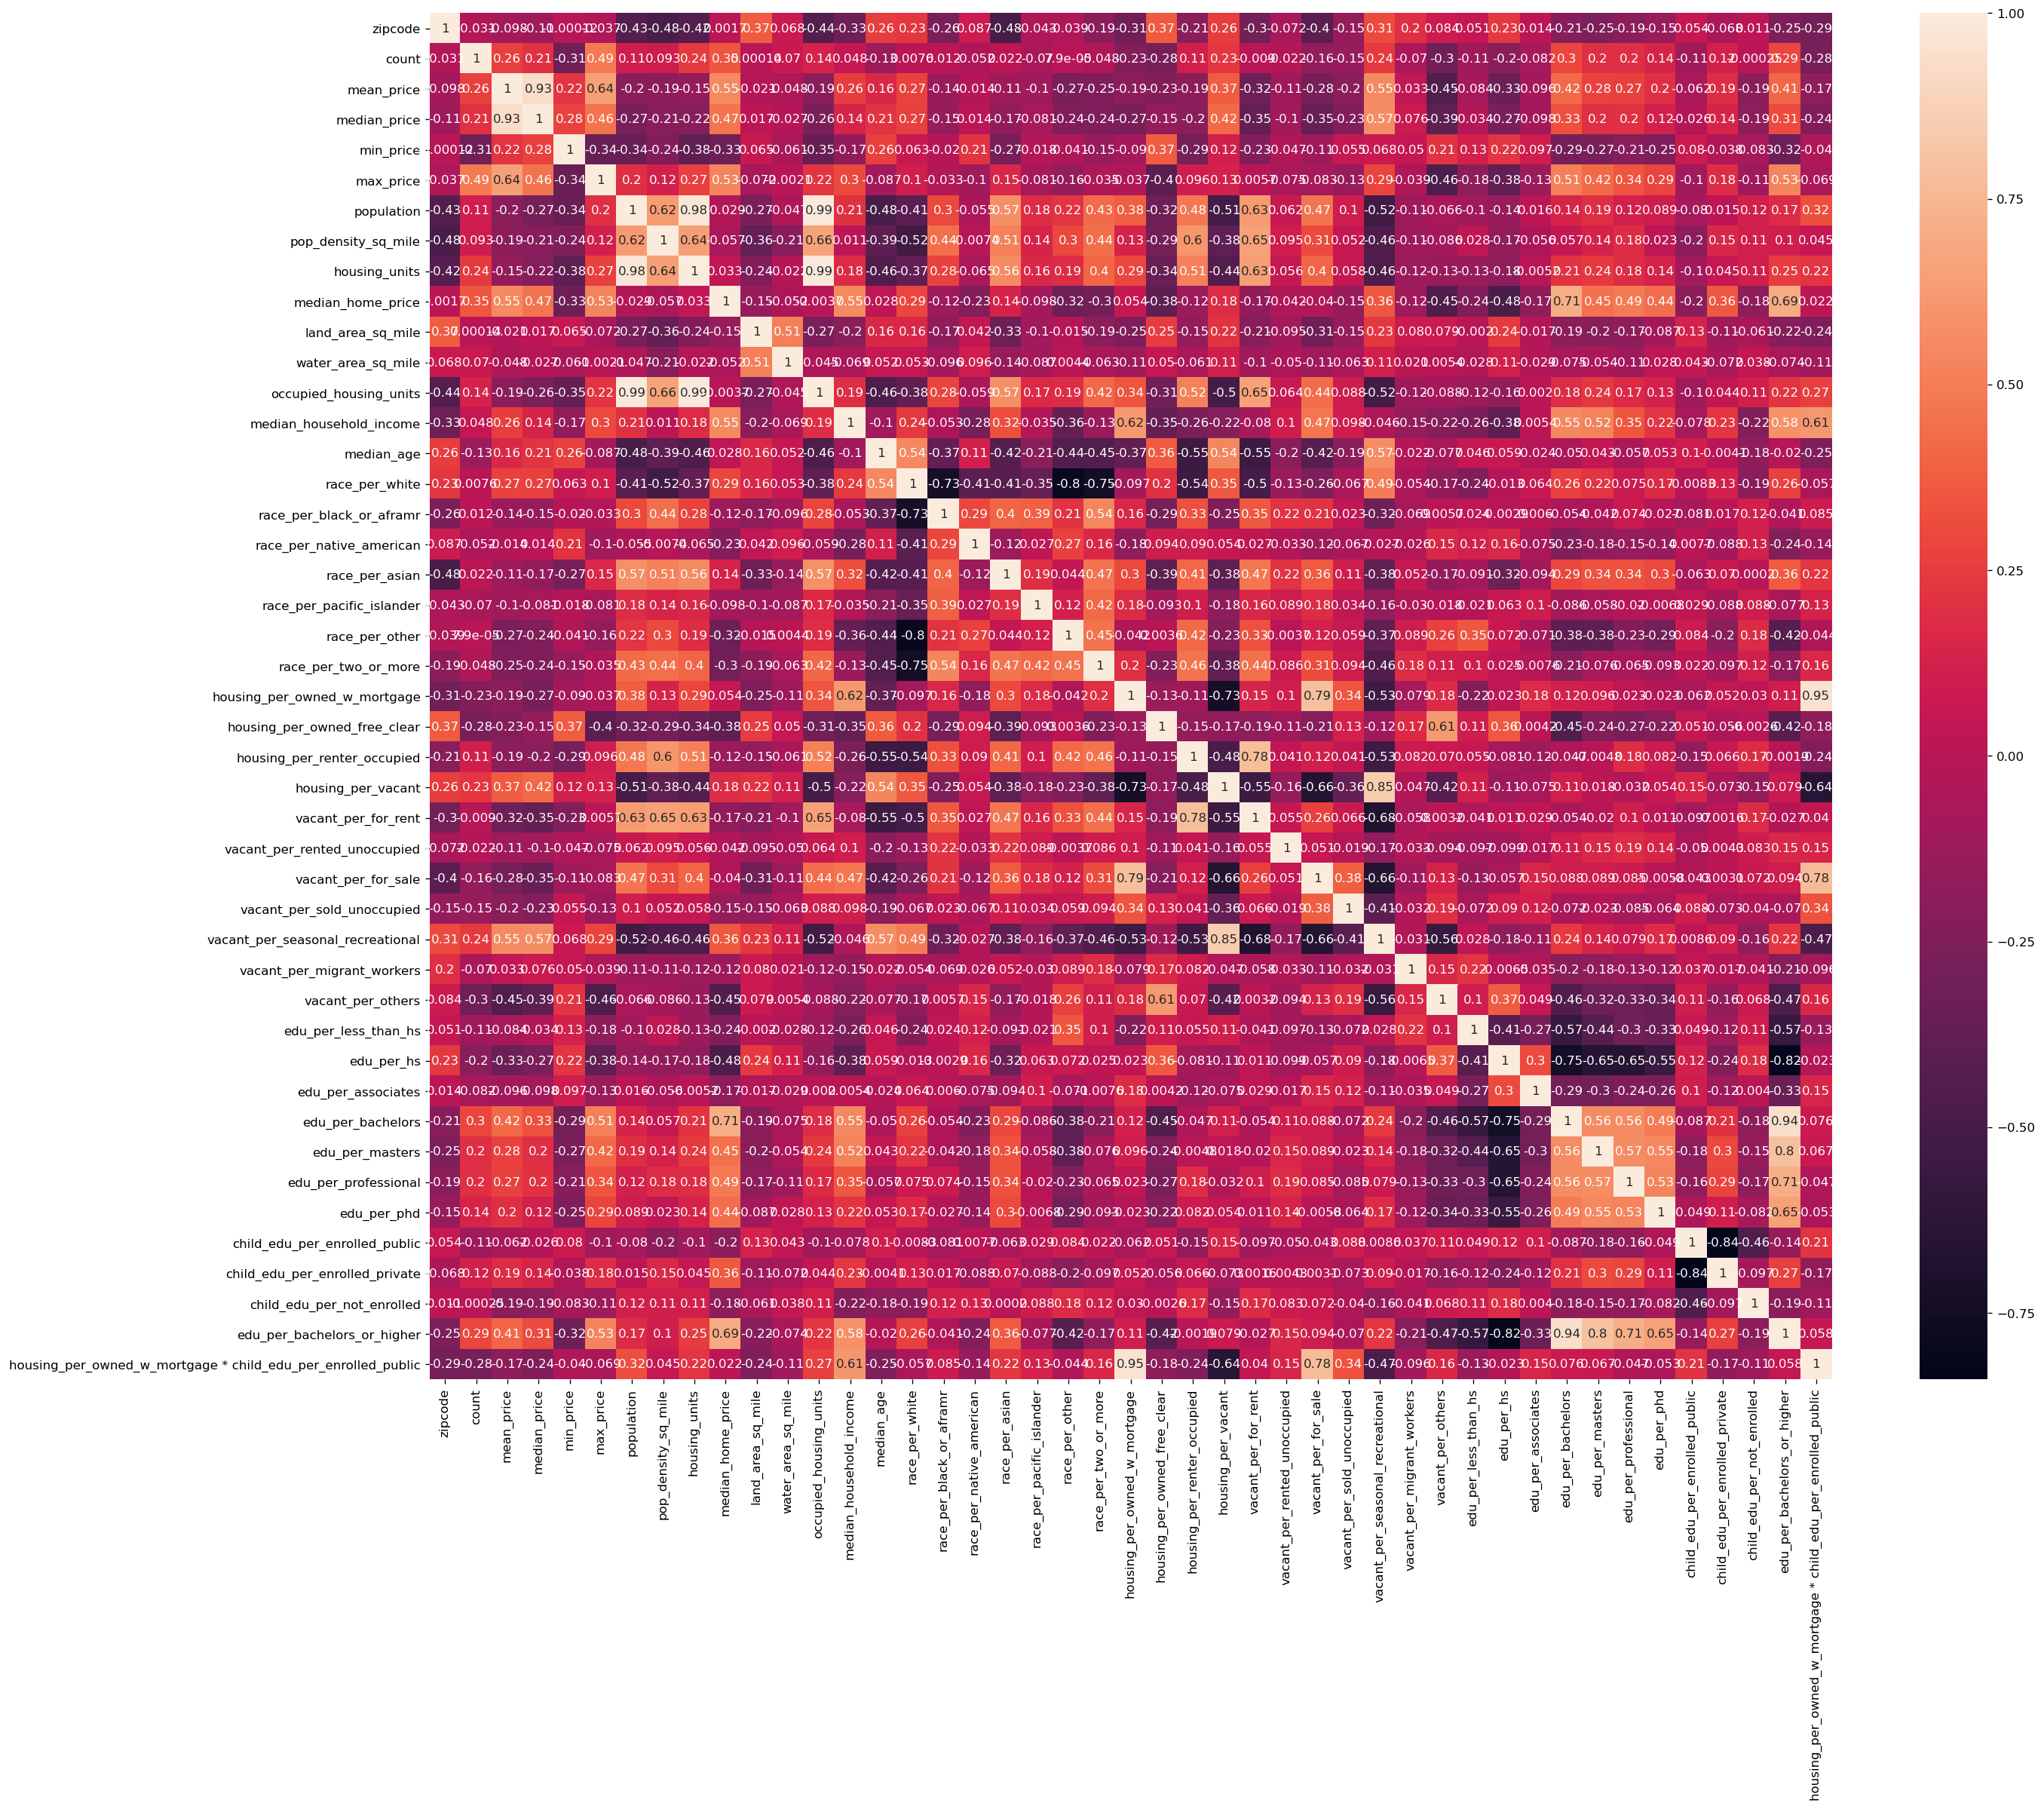

In [28]:
# Create a correlation chart of everything.
corr = listings_and_zipcodes_df.corr()

# Show chart. This is too big! We need to narrow it down.
plt.figure(figsize=(25, 20), dpi=120)
sns.heatmap(corr, annot=True)
plt.show()

In [29]:
# By isolating the list of variables that correlate with median price, we can find the values that have
# the strongest positive and negative relationships, and pull those out.
corr['median_price'].sort_values(ascending=False)

median_price                                                    1.000000
mean_price                                                      0.931141
vacant_per_seasonal_recreational                                0.567483
median_home_price                                               0.467093
max_price                                                       0.459346
housing_per_vacant                                              0.420747
edu_per_bachelors                                               0.325547
edu_per_bachelors_or_higher                                     0.307221
min_price                                                       0.278876
race_per_white                                                  0.267120
median_age                                                      0.213094
count                                                           0.208197
edu_per_professional                                            0.203673
edu_per_masters                                    

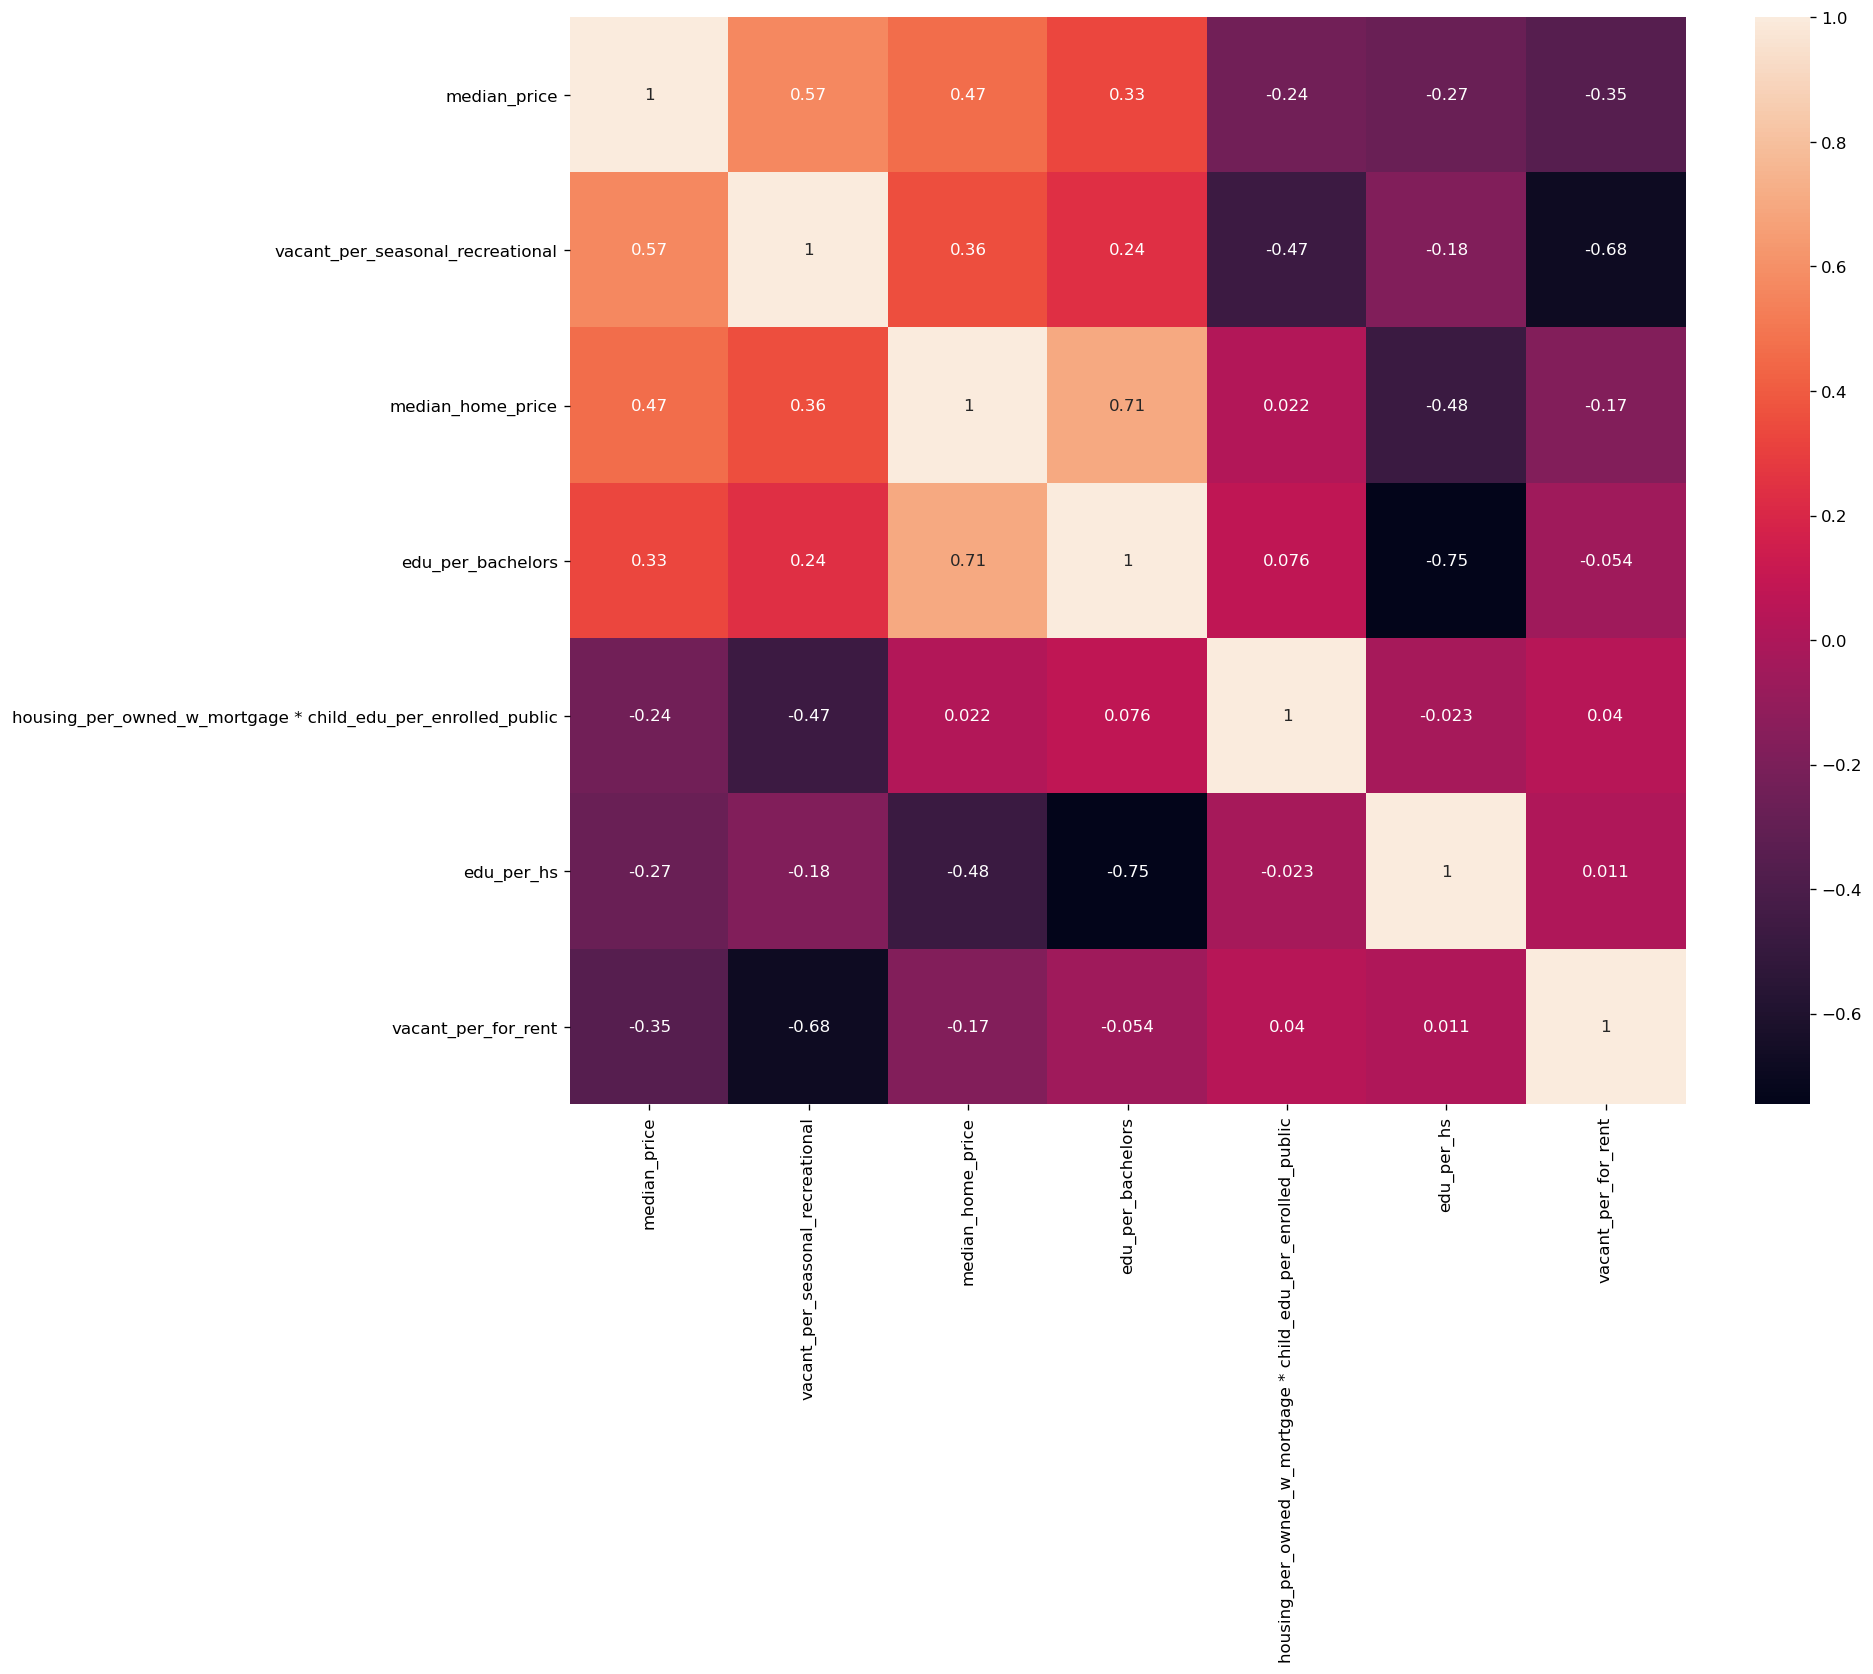

In [30]:
# Let's visualize that heatmap again, but this time just with a short list of variables.
columns = ['median_price','vacant_per_seasonal_recreational',
           'median_home_price','edu_per_bachelors',
           'housing_per_owned_w_mortgage * child_edu_per_enrolled_public',
           'edu_per_hs','vacant_per_for_rent']

corr = listings_and_zipcodes_df[columns].corr()

# This looks much cleaner! It is still an eye chart, but an analyst can work their way through this fairly
# quickly.
plt.figure(figsize=(15, 12), dpi=120)
sns.heatmap(corr, annot=True)
plt.show()


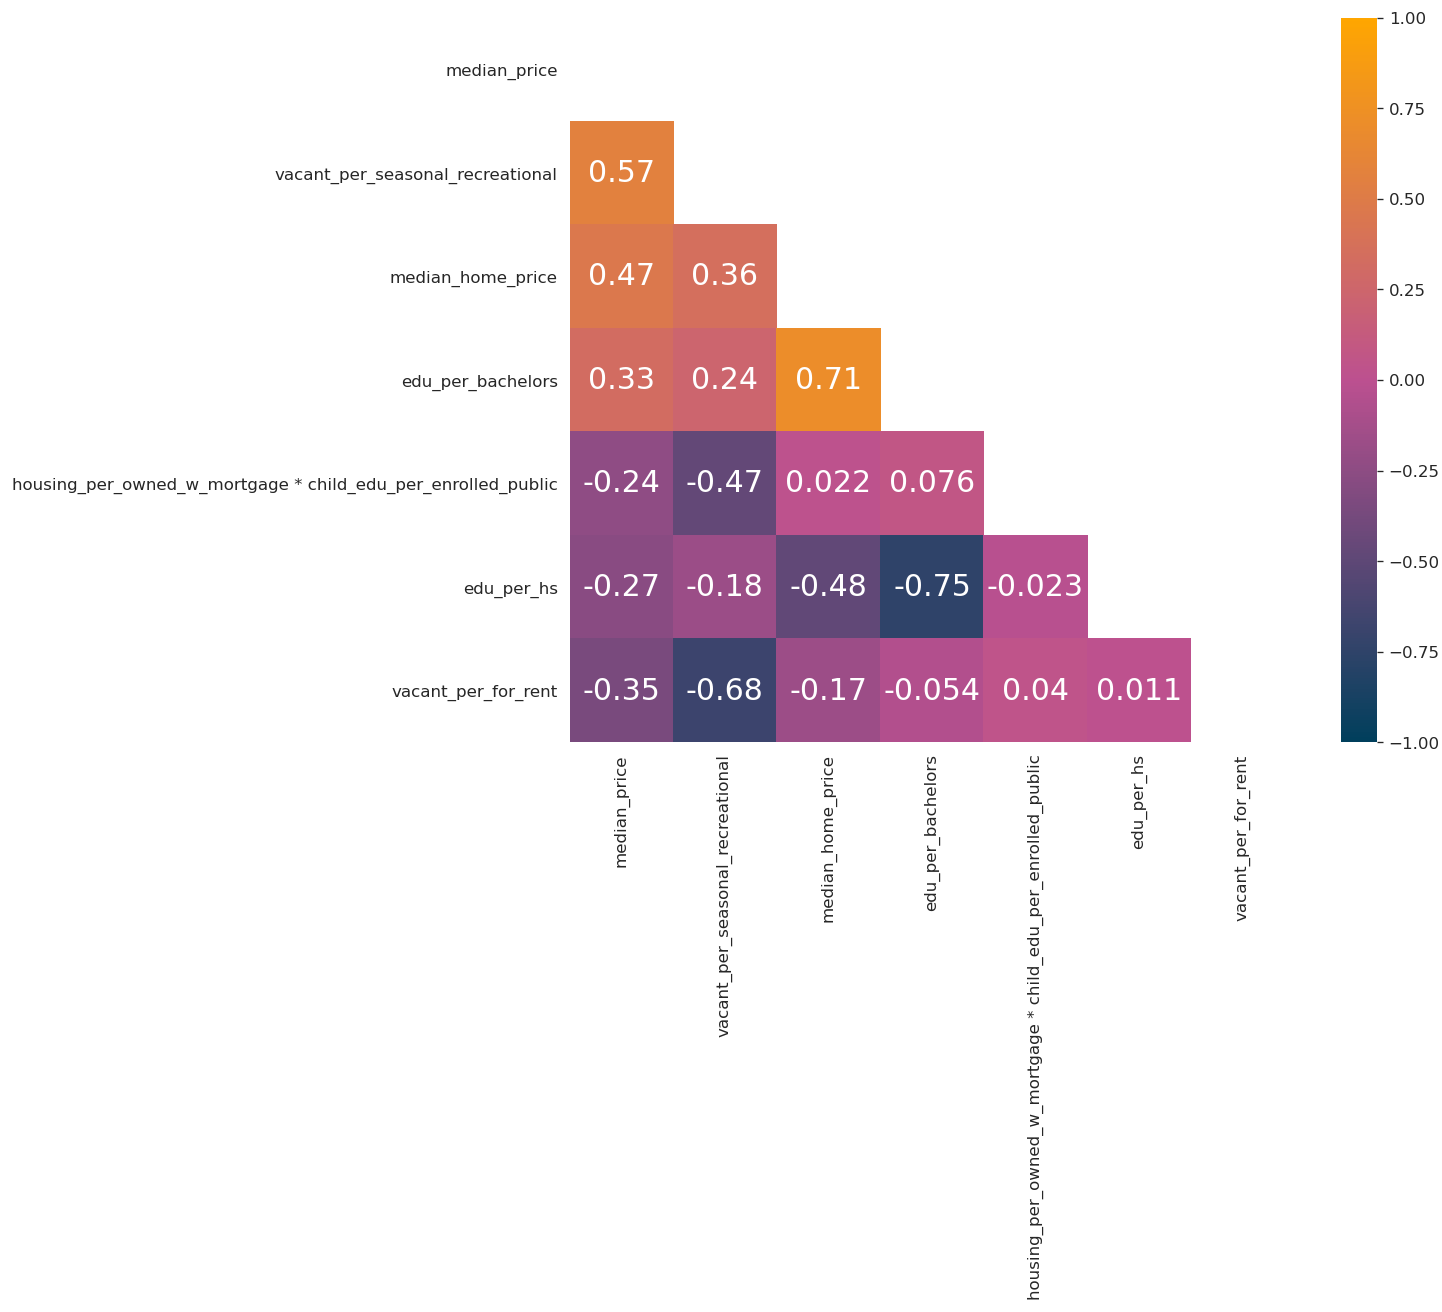

In [31]:
# Let's make one final, presentation quality version. This ended up not being included in the final slides,
# but it is a shiny looking correlation heatmap with presentation branded colors.
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [ '#003f5c','#bc5090','#ffa600'])

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 8), dpi=120)
    ax = sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, square=True, annot=True, cmap=cmap,annot_kws={"size": 18})

# Now let's consider the correlation between n_listings * median nightly price and the different variables in the set.

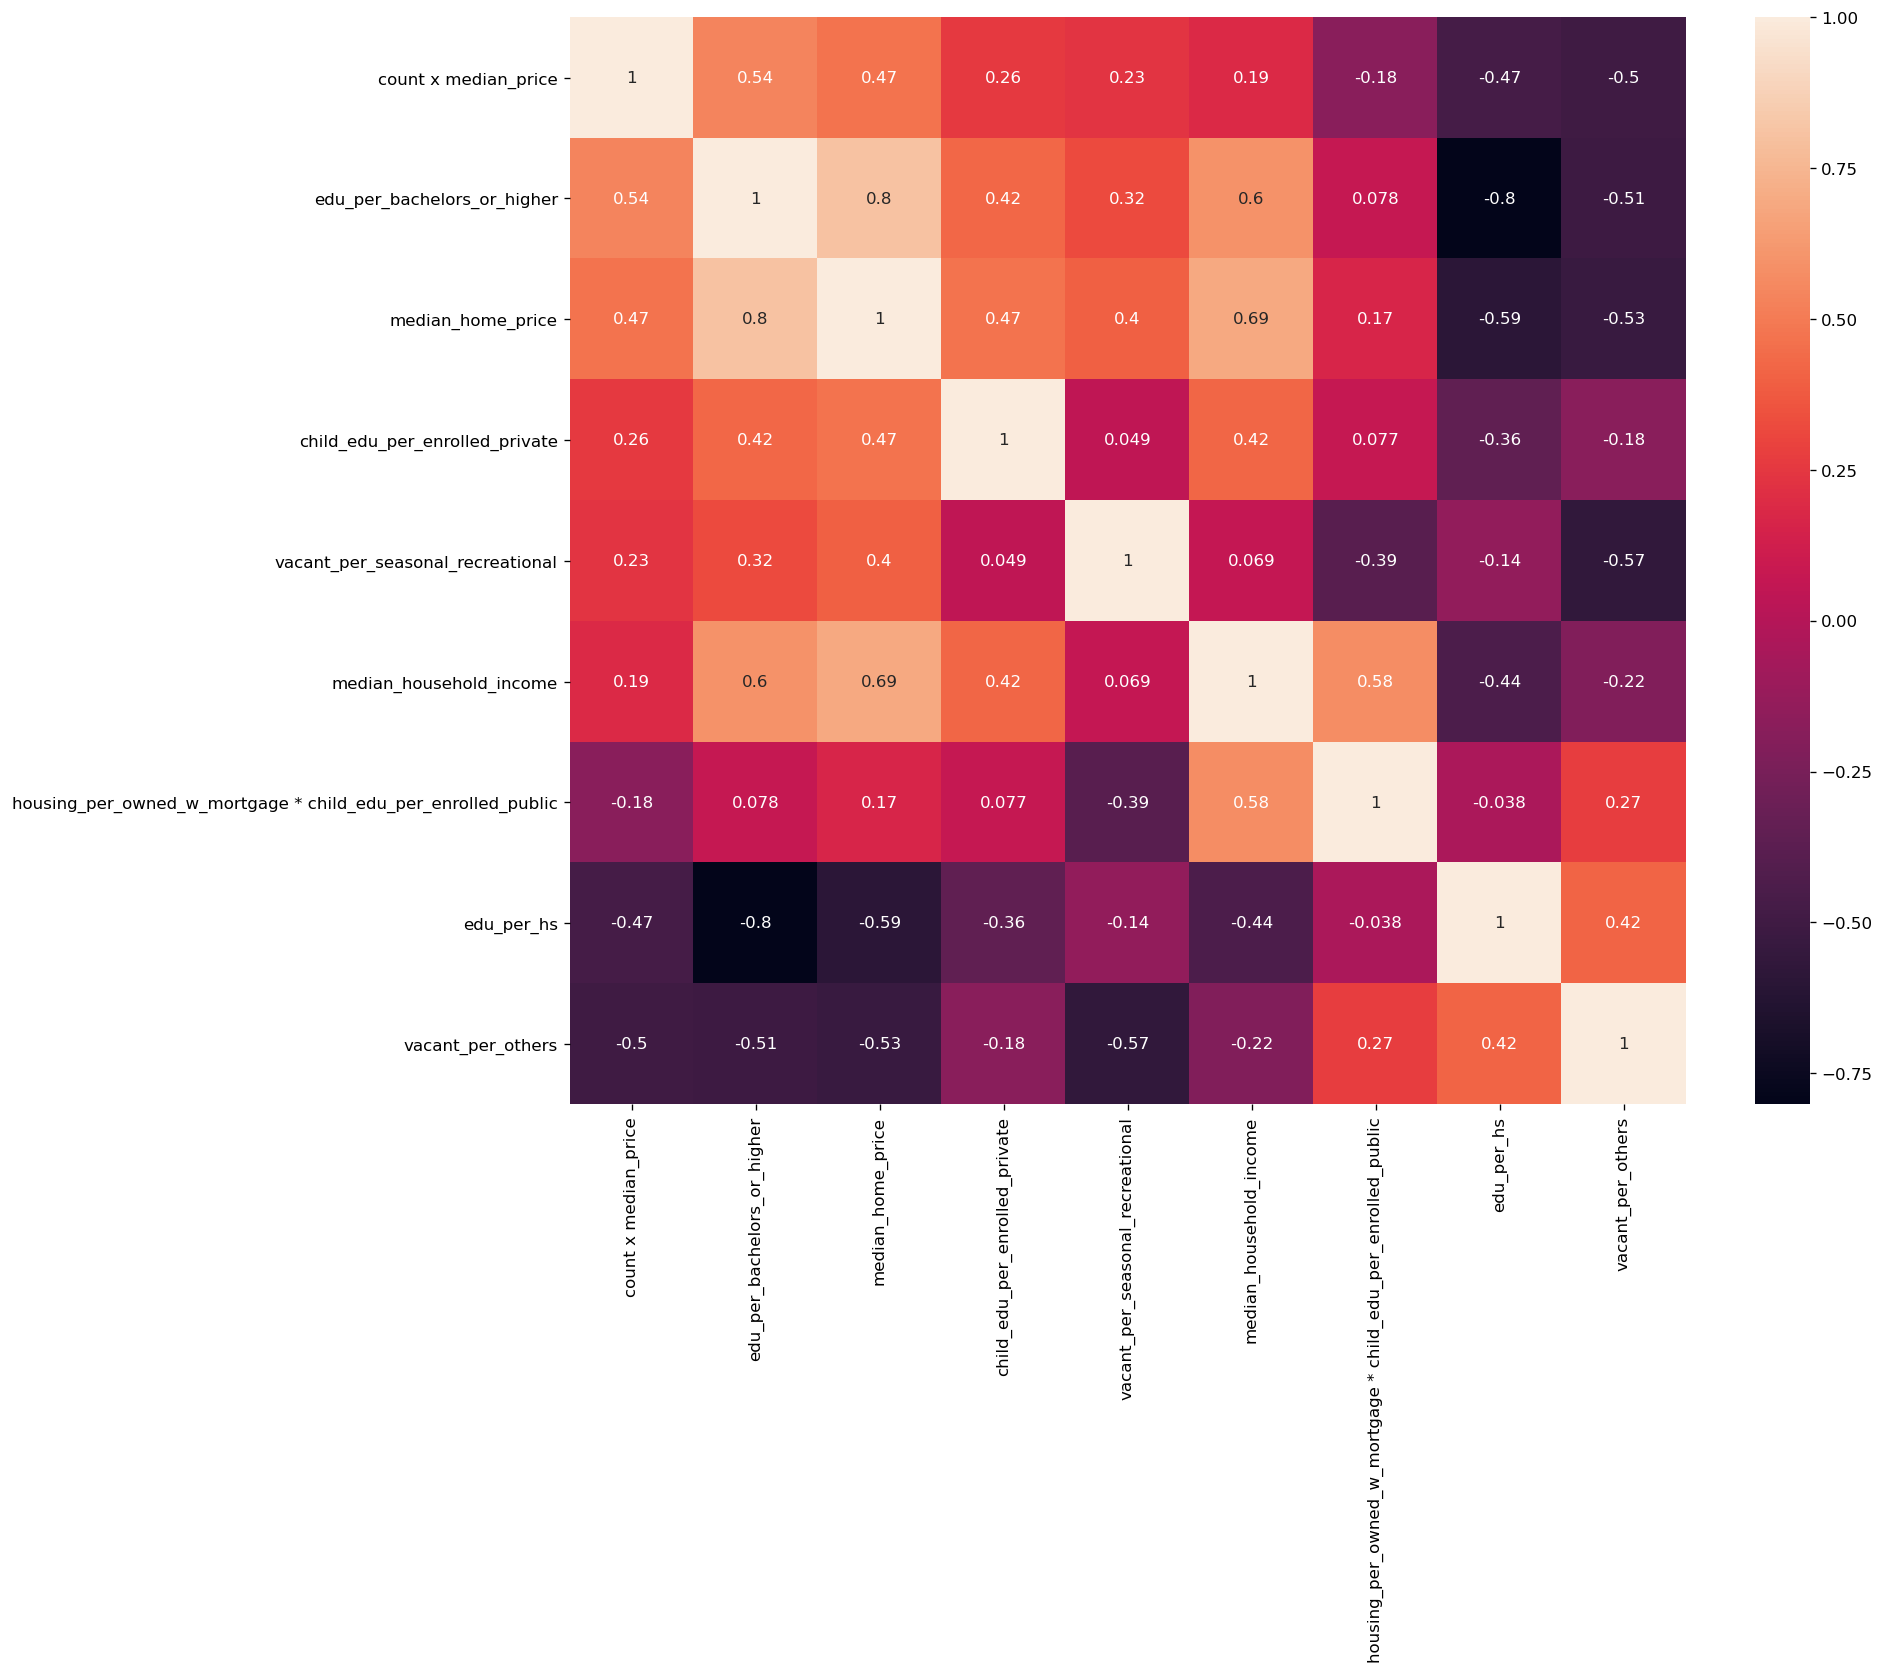

In [32]:
# Ths time, we'll skip the massive heatmap and start with a short list of variables that correlation with the
# dependent variable, `count x median_price.

# Feature engineering: create `count x median_price`.
listings_and_zipcodes_df['count x median_price'] = listings_and_zipcodes_df['count'] * listings_and_zipcodes_df['median_price']

# Short list of columns.
columns = ['count x median_price','edu_per_bachelors_or_higher','median_home_price','child_edu_per_enrolled_private',
          'vacant_per_seasonal_recreational','median_household_income','housing_per_owned_w_mortgage * child_edu_per_enrolled_public',
          'edu_per_hs','vacant_per_others']

# Correlation. Do a Spearman correlation, which seems to fit this dataset better.
corr = listings_and_zipcodes_df[columns].corr(method='spearman')

# Show the chart.
plt.figure(figsize=(15, 12), dpi=120)
sns.heatmap(corr, annot=True)
plt.show()


In [33]:
# Not shown in this final Jupyter Notebook: we looked at the outputs of mountain_corr and not_corr, identified
# the strongest variables for mountain_corr, and looked at how those compared to not_corr. More on this
# in the presentation!


# Divide mountains and not mountains.
mountains = listings_df[(listings_df['est_lng'] <=-105.5)]
not_mountains = listings_df[listings_df['est_lng'] >-105.5]

# Group by zip code.
mountains = groupby_area('zipcode', df=mountains)
not_mountains = groupby_area('zipcode', df=not_mountains)

# Merge the zipcode demographic data.
mountains = pd.merge(mountains, zipcodes_df,how='left',on='zipcode')
not_mountains =  pd.merge(not_mountains, zipcodes_df,how='left',on='zipcode')

# Feature engineering: create `count x median_price`.
mountains['count x median_price'] = mountains['count'] * mountains['median_price']
not_mountains['count x median_price'] = not_mountains['count'] * not_mountains['median_price']

# Create spearman correlations with each dataset.
mountain_corr = mountains.corr(method='spearman')
not_corr = not_mountains.corr(method='spearman')


<ipython-input-8-7f75decaf663>:5: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  frame = count.merge(price, on=group,how='left')
<ipython-input-8-7f75decaf663>:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  frame = count.merge(price, on=group,how='left')
<ipython-input-8-7f75decaf663>:5: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  frame = count.merge(price, on=group,how='left')
<ipython-input-8-7f75decaf663>:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  frame = count.merge(price, on=group,how='left')


# 7. Can we create a predictive model that can figure out AirBnB's `count x median_price` zip code value?

While we fail to create a model that predicts `count x median_price` well, we do create a moderately good model (r^2 = .6~) that can predict the `housing_per_owned_w_mortgage * child_edu_per_enrolled_public` (our proxy for how friendly a community is for having and raising a family).

Below creates a function for generating multiple linear regression model, as well as evaluating the predicted vs. actual values, and showing the results.

In [34]:
# Function to create a statsmodel multiple linear regression model, and visualize the predicted vs. actual
# scores.

def regression_model(df, y, x=None):
    
    sns.set(rc={'figure.figsize':(16,4)})
        
    # Drop any records with null values for the features (x) and dependent variable (y).
    df = df.dropna(subset=x)
    df = df.dropna(subset=y)
    
    # Pull out X and y into their own arrays.
    y = df[y]
    X = df[x]
    
    # Create a 30% test / 70% train split between the dataset.
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size =0.7, test_size=0.3, random_state=100)
    
    # Set a constant.
    X_train_sm = sm.add_constant(X_train)
    
    # Create a regression model.
    lr = sm.OLS(y_train, X_train_sm.astype(float)).fit()
    
    # Save the model's results.
    lr_robust = lr.get_robustcov_results()
    
    # Add a constant to X_test
    X_test_sm = sm.add_constant(X_test)
    # Predict the y values corresponding to X_test_sm
    y_pred = lr.predict(X_test_sm)
    
    # Save the predicted vs. actual results in a DataFrame
    pred_vs_actual = pd.DataFrame(data={'actual':y_test, 'predicted':y_pred})
    pred_vs_actual['squared_error'] = (pred_vs_actual['actual'] - pred_vs_actual['predicted'])**2
    pred_vs_actual['squared_error'] = pred_vs_actual['squared_error'].astype('int')
    

    # create regression plot of actual vs. predicted values.
    plot = sns.lmplot(
        data = pred_vs_actual, 
        x = "actual",
        y = "predicted",
        line_kws={'color': '#003f5c'},
        scatter_kws={'color': '#ffa600', 'alpha':0.5}
    )
    plot.fig.set_size_inches(16,4)
    
    # Print the regression summary, and the plot.
    print(lr_robust.summary())
    plt.show()
    

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


                             OLS Regression Results                             
Dep. Variable:     count x median_price   R-squared:                       0.265
Model:                              OLS   Adj. R-squared:                  0.221
Method:                   Least Squares   F-statistic:                     2.967
Date:                  Mon, 23 May 2022   Prob (F-statistic):             0.0162
Time:                          14:59:36   Log-Likelihood:                -1089.8
No. Observations:                    91   AIC:                             2192.
Df Residuals:                        85   BIC:                             2207.
Df Model:                             5                                         
Covariance Type:                    HC1                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

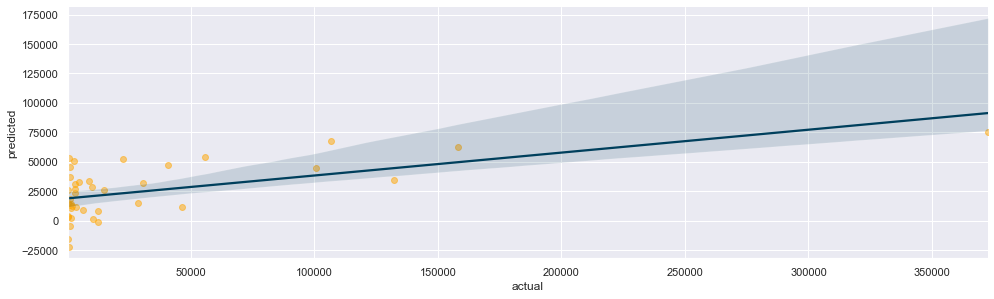

In [35]:
# Model 1.
y = 'count x median_price'
X = ['edu_per_bachelors_or_higher','median_home_price','vacant_per_seasonal_recreational',
     'housing_per_owned_w_mortgage * child_edu_per_enrolled_public','housing_per_owned_free_clear']

regression_model(df=mountains, y=y, x=X)


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     927.2
Date:                Mon, 23 May 2022   Prob (F-statistic):               0.00
Time:                        14:59:37   Log-Likelihood:            -1.0313e+05
No. Observations:               16840   AIC:                         2.063e+05
Df Residuals:                   16829   BIC:                         2.064e+05
Df Model:                          10                                         
Covariance Type:                  HC1                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3625.5922    123.888    -29.265      

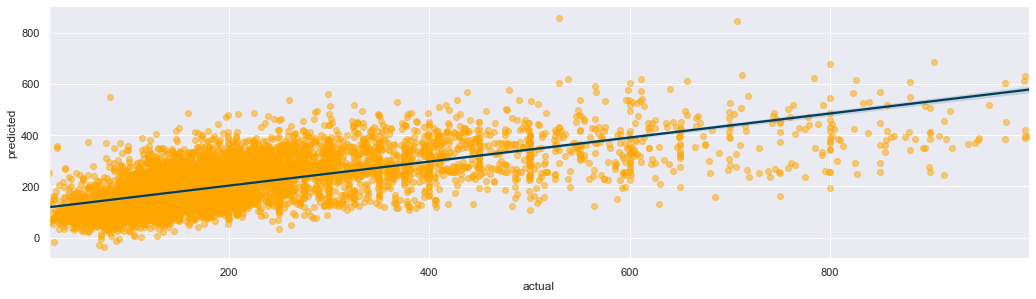

In [36]:
# Model 2.

y = 'price'
X = ['superhost', 'rating', 'n_ratings','guests',
       'beds', 'bedrooms', 'baths', 'n_amenities','est_lat','est_lng']

regression_model(df=listings_df[(listings_df['price'] >= 20)], y=y, x=X)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


                                                 OLS Regression Results                                                 
Dep. Variable:     housing_per_owned_w_mortgage * child_edu_per_enrolled_public   R-squared:                       0.589
Model:                                                                      OLS   Adj. R-squared:                  0.571
Method:                                                           Least Squares   F-statistic:                     60.74
Date:                                                          Mon, 23 May 2022   Prob (F-statistic):           1.62e-24
Time:                                                                  14:59:37   Log-Likelihood:                 108.14
No. Observations:                                                            93   AIC:                            -206.3
Df Residuals:                                                                88   BIC:                            -193.6
Df Model:                       

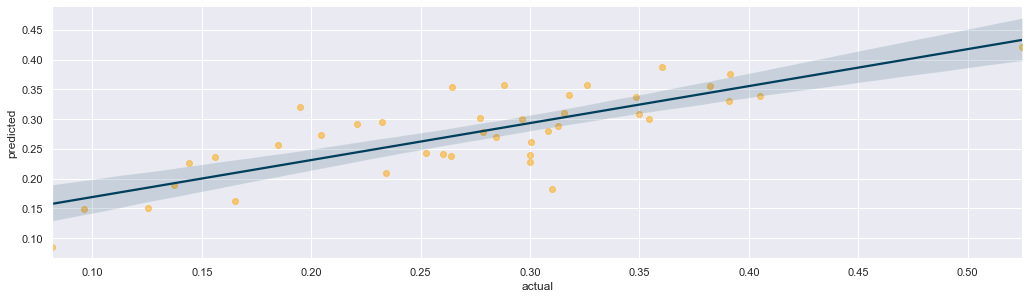

In [37]:
# Model 3.

y = 'housing_per_owned_w_mortgage * child_edu_per_enrolled_public'
X = ['vacant_per_seasonal_recreational',
     'count x median_price', 'median_household_income','housing_per_vacant']

regression_model(df=mountains, y=y, x=X)

# That's it! This is a companion piece to the final presentation itself, which dives more into the narrative.